In [1]:
# import necessary modules 
import numpy  as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# build dataset
dataset = pd.read_csv("Social_Network_Ads.csv")
dataset

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [3]:
# convert Gender to numeric value (0 or 1 meaning female and male respectively)
dataset["Gender"] = dataset["Gender"].mask(dataset["Gender"] == "Male", 1)
dataset["Gender"] = dataset["Gender"].mask(dataset["Gender"] == "Female", 0)
dataset

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,1,19,19000,0
1,15810944,1,35,20000,0
2,15668575,0,26,43000,0
3,15603246,0,27,57000,0
4,15804002,1,19,76000,0
...,...,...,...,...,...
395,15691863,0,46,41000,1
396,15706071,1,51,23000,1
397,15654296,0,50,20000,1
398,15755018,1,36,33000,0


In [4]:
# dataset summary
dataset.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


In [5]:
# dataset_columns, input columns, output columns
dataset_columns = dataset.columns.values.tolist()
dataset_columns_number = len(dataset_columns)
input_columns  = dataset_columns[: dataset_columns_number - 1] 
output_columns = dataset_columns[  dataset_columns_number - 1 :]
input_columns, output_columns

(['User ID', 'Gender', 'Age', 'EstimatedSalary'], ['Purchased'])

In [6]:
# build input matrix
real_input  = dataset[input_columns].copy()
real_input

,User ID,Gender,Age,EstimatedSalary
0,15624510,1,19,19000
1,15810944,1,35,20000
2,15668575,0,26,43000
3,15603246,0,27,57000
4,15804002,1,19,76000
...,...,...,...,...
395,15691863,0,46,41000
396,15706071,1,51,23000
397,15654296,0,50,20000
398,15755018,1,36,33000


In [7]:
# build output matrix
real_output = dataset[output_columns].copy() 
real_output

,Purchased
0,0
1,0
2,0
3,0
4,0
...,...
395,1
396,1
397,1
398,0


In [8]:
# review input matrix
# User ID is not connected to prediction. it's just a unique id given to a user.
# so it can be deleted.
del real_input["User ID"]
real_input

,Gender,Age,EstimatedSalary
0,1,19,19000
1,1,35,20000
2,0,26,43000
3,0,27,57000
4,1,19,76000
...,...,...,...
395,0,46,41000
396,1,51,23000
397,0,50,20000
398,1,36,33000


In [9]:
# input dataset outlier detection

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x07E5A5F0>,
      dtype=object)

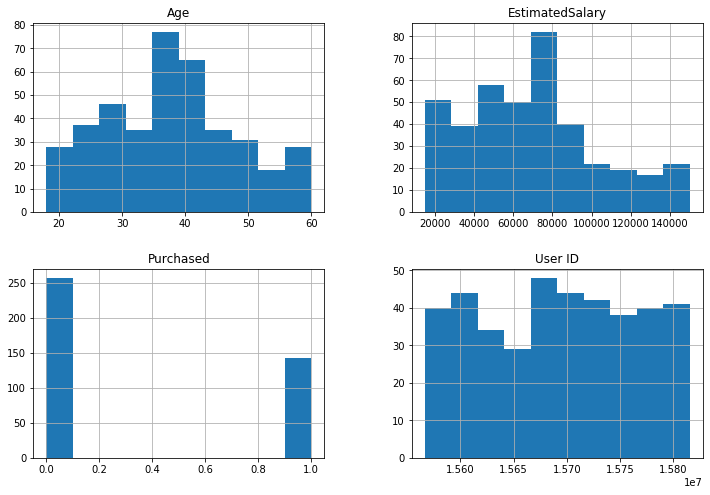

In [10]:
# histogram plot
dataset.hist(figsize = (12, 8), bins = 10)

In [11]:
'''
All feature data is well distributed. No outlier found from histogram.
'''

'\nAll feature data is well distributed. No outlier found from histogram.\n'

In [12]:
# Converting real_input and real_output to numpy array for easy calculation
real_input  = np.array(real_input,  dtype = np.float64)
real_output = np.array(real_output, dtype = np.float64)
real_input.shape, real_output.shape

((400, 3), (400, 1))

In [13]:
dataset_len = real_output.size

K = []
Accuracy = []

# KNN model implementation
for k in range(1, dataset_len, 2):
    K.append(k)
    predicted_output = np.array([[3]], dtype = np.int8)
    
    for i in range(dataset_len):
        data = {"Euclidean Distance" : [], "Group" : []}
        euclid_array = pd.DataFrame(data)

        euclid_array["Euclidean Distance"] = np.sum(np.sqrt((real_input[i] - real_input)**2),\
                                                    axis = 1).tolist()  
        euclid_array["Group"] = real_output.copy()

        # sort euclid_array in ascending order according to "Euclidean Distance"
        euclid_array = euclid_array.sort_values(by = ["Euclidean Distance"])

        try:
            purchased = euclid_array["Group"][:k].value_counts()[1]
        except KeyError:
            purchased = 0
        try:
            not_purchased = euclid_array["Group"][:k].value_counts()[0]  
        except KeyError:
            not_purchased = 0

        if purchased > not_purchased:
            predicted_output = np.append(predicted_output, [[1]], axis = 0)
        else:
            predicted_output = np.append(predicted_output, [[0]], axis = 0)

    predicted_output = np.delete(predicted_output, obj = 0, axis = 0)
    
    value_not_matched = np.sum(np.abs(predicted_output - real_output))
    accuracy = (dataset_len - value_not_matched) / dataset_len * 100
    Accuracy.append(accuracy)

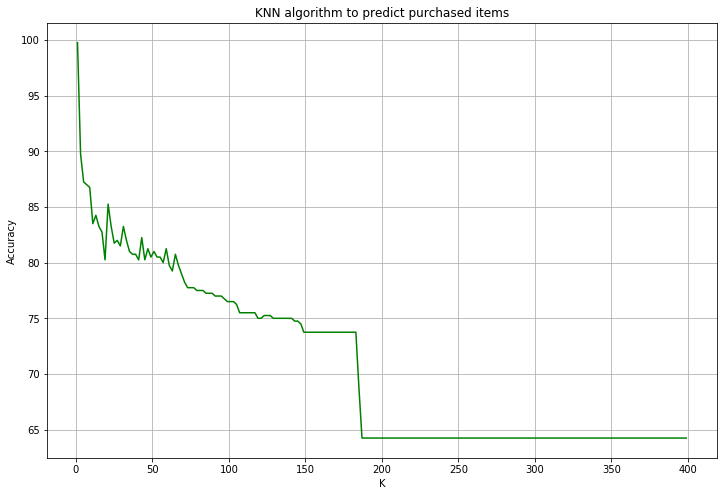

In [14]:
# graph plot
%matplotlib inline
plt.rcParams["figure.figsize"] = (12, 8)
plt.figure(1)
plt.plot(K, Accuracy, 'g-')
plt.grid(True)
plt.title("KNN algorithm to predict purchased items")
plt.xlabel("K")
plt.ylabel("Accuracy")
plt.show()